### Importation

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

In [17]:
df_telco_customer = pd.read_csv('./telco_customer_dataset.csv')
display(df_telco_customer.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Removes the results column

In [18]:
from sklearn.preprocessing import MinMaxScaler

x = df_telco_customer.drop(['Churn', 'customerID'], axis=1)
y = df_telco_customer['Churn']

### Convert categorical columns to numeric values

In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

encoder = ColumnTransformer(
    transformers=[
        ("categorics", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
         make_column_selector(dtype_include="object"))
    ],
    remainder="passthrough"
)

label_encoder = LabelEncoder()

x_pre = encoder.fit_transform(x)
y_pre = label_encoder.fit_transform(y)

display(x_pre)
display(y_pre)

array([[  0.  ,   1.  ,   0.  , ...,   0.  ,   1.  ,  29.85],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  34.  ,  56.95],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,   2.  ,  53.85],
       ...,
       [  0.  ,   1.  ,   1.  , ...,   0.  ,  11.  ,  29.6 ],
       [  1.  ,   1.  ,   0.  , ...,   1.  ,   4.  ,  74.4 ],
       [  1.  ,   0.  ,   0.  , ...,   0.  ,  66.  , 105.65]])

array([0, 0, 1, ..., 0, 1, 0])

### Slipts the data into train and test 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
x_pre, y_pre, test_size=0.3, random_state=42
)

### Normalize data

In [21]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

### Applying GaussianNB Model

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gnb = GaussianNB()

gnb.fit(X_train_norm, y_train)

y_pred_gnb = gnb.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Classification Report:\n", classification_report(y_test, y_pred_gnb))


Accuracy: 0.7557974443918599
Confusion Matrix:
 [[1164  375]
 [ 141  433]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1539
           1       0.54      0.75      0.63       574

    accuracy                           0.76      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113



### Result Plot GaussianNB

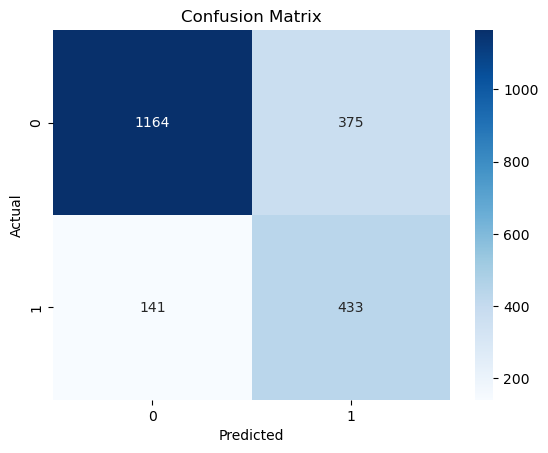

In [23]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Applying KNeighborsClassifier Model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


Accuracy: 0.7553241836251775
Confusion Matrix:
 [[1373  166]
 [ 351  223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1539
           1       0.57      0.39      0.46       574

    accuracy                           0.76      2113
   macro avg       0.68      0.64      0.65      2113
weighted avg       0.74      0.76      0.74      2113



### Result Plot KNeighborsClassifier

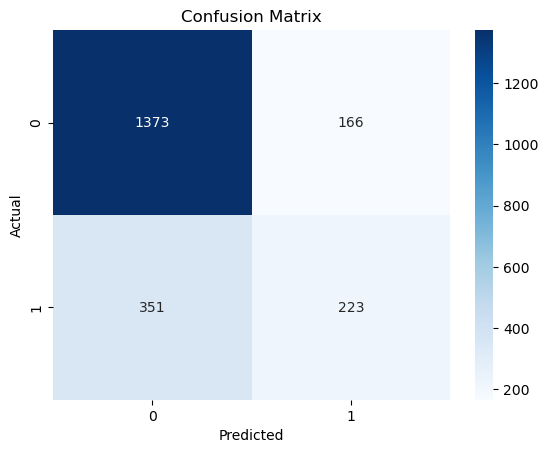

In [25]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Applying MultinomialNB Model

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

mnb = MultinomialNB()

mnb.fit(X_train_norm, y_train)

y_pred_mnb = mnb.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Classification Report:\n", classification_report(y_test, y_pred_mnb))


Accuracy: 0.7789872219592996
Confusion Matrix:
 [[1402  137]
 [ 330  244]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86      1539
           1       0.64      0.43      0.51       574

    accuracy                           0.78      2113
   macro avg       0.72      0.67      0.68      2113
weighted avg       0.76      0.78      0.76      2113



### Result Plot MultinomialNB

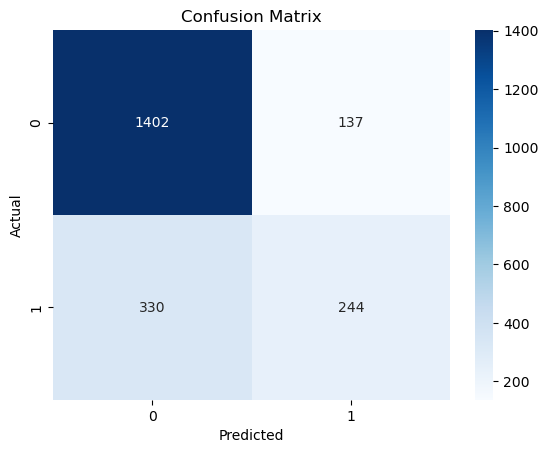

In [27]:
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Applying DecisionTreeClassifier Model

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf_gini = DecisionTreeClassifier(criterion='gini')

clf_gini.fit(X_train_norm, y_train)

y_pred_clf_gini = clf_gini.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred_clf_gini))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clf_gini))
print("Classification Report:\n", classification_report(y_test, y_pred_clf_gini))

clf_entropy = DecisionTreeClassifier(criterion='entropy')

clf_entropy.fit(X_train_norm, y_train)

y_pred_clf_entropy = clf_entropy.predict(X_test_norm)

print("Accuracy:", accuracy_score(y_test, y_pred_clf_entropy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clf_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_clf_entropy))


Accuracy: 0.7283483199242783
Confusion Matrix:
 [[1256  283]
 [ 291  283]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1539
           1       0.50      0.49      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.65      0.66      2113
weighted avg       0.73      0.73      0.73      2113

Accuracy: 0.7392333175579744
Confusion Matrix:
 [[1261  278]
 [ 273  301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1539
           1       0.52      0.52      0.52       574

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113



### Result Plot DecisionTreeClassifier

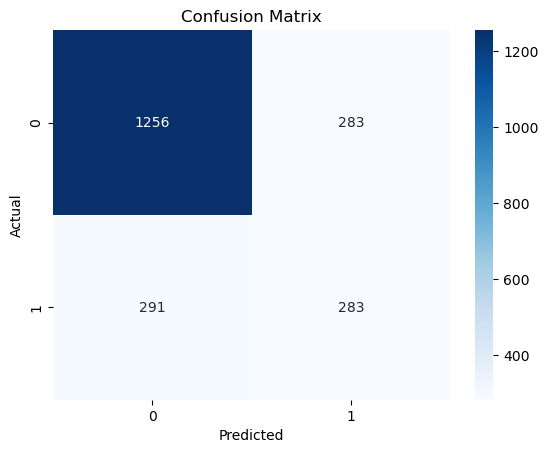

In [29]:
cm_clf_gini = confusion_matrix(y_test, y_pred_clf_gini)
sns.heatmap(cm_clf_gini, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

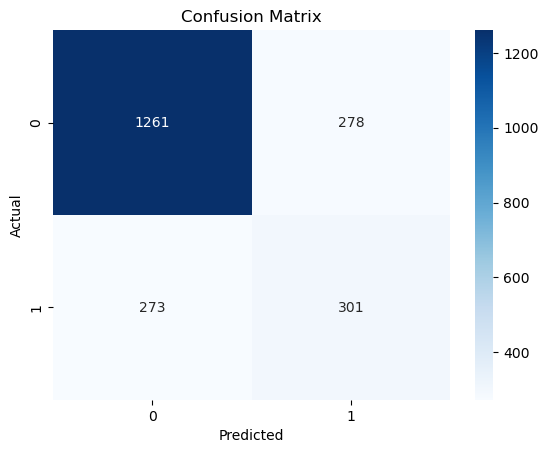

In [30]:
cm_clf_entropy = confusion_matrix(y_test, y_pred_clf_entropy)
sns.heatmap(cm_clf_entropy, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()